# 데이터 불러오기

In [1]:
import pandas as pd
main = pd.read_csv('/content/월드컵 경기장 자료 종합 11~19.csv')

In [2]:
main.head()

,연번,경기(행사) 일시,구 분,경기(행사) 종류,경기(행사) 내용,주 최,관람인원,수입금(원),사용일수(일)
0,NaN,2011-05-04,NaN,FC서울홈경기,ACL(vs알아인),GS스포츠,23593,36821430,2.0
1,NaN,2011-05-15,NaN,FC서울홈경기,K리그(vs경남),GS스포츠,26008,38325470,1.0
2,NaN,2011-05-18,NaN,FC서울홈경기,FA컵(vs용인시청),GS스포츠,3733,6504670,1.0
3,NaN,2011-05-21,NaN,FC서울홈경기,K리그(vs대구),GS스포츠,14817,28484710,1.0
4,NaN,2011-05-25,NaN,FC서울홈경기,ACL(vs가시마 엔틀러스),GS스포츠,12725,32208280,2.0


In [3]:
main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   연번         215 non-null    float64
 1   경기(행사) 일시  364 non-null    object 
 2   구 분        215 non-null    object 
 3   경기(행사) 종류  364 non-null    object 
 4   경기(행사) 내용  364 non-null    object 
 5   주 최        364 non-null    object 
 6   관람인원       362 non-null    object 
 7   수입금(원)     354 non-null    object 
 8   사용일수(일)    359 non-null    float64
dtypes: float64(2), object(7)
memory usage: 25.7+ KB


In [4]:
main['경기(행사) 일시'] = pd.to_datetime(main['경기(행사) 일시'])

In [5]:
main['관람인원'] = main['관람인원'].ffill(limit=None)
main['수입금(원)'] = main['수입금(원)'].ffill(limit=None)

In [6]:
main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   연번         215 non-null    float64       
 1   경기(행사) 일시  364 non-null    datetime64[ns]
 2   구 분        215 non-null    object        
 3   경기(행사) 종류  364 non-null    object        
 4   경기(행사) 내용  364 non-null    object        
 5   주 최        364 non-null    object        
 6   관람인원       364 non-null    object        
 7   수입금(원)     364 non-null    object        
 8   사용일수(일)    359 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 25.7+ KB


In [7]:
import numpy as np

main['관람인원'] = main['관람인원'].replace(' - ', np.nan)
main['관람인원'] = main['관람인원'].astype('float').astype('Int64')

In [8]:
import numpy as np

main['수입금(원)'] = main['수입금(원)'].replace(' - ', np.nan)
main['수입금(원)'] = main['수입금(원)'].astype('float').astype('Int64')

In [9]:
main = main.drop(['연번'], axis = 1)

In [10]:
main['경기 월일'] = main['경기(행사) 일시'].apply(lambda x: x.strftime('%m-%d'))

In [11]:
main[['경기(행사) 일시', '경기(행사) 종류', '관람인원', '수입금(원)']]

,경기(행사) 일시,경기(행사) 종류,관람인원,수입금(원)
0,2011-05-04,FC서울홈경기,23593,36821430
1,2011-05-15,FC서울홈경기,26008,38325470
2,2011-05-18,FC서울홈경기,3733,6504670
3,2011-05-21,FC서울홈경기,14817,28484710
4,2011-05-25,FC서울홈경기,12725,32208280
...,...,...,...,...
359,2019-10-18,제39회 장애인체전,200,354510
360,2019-10-18,제39회 장애인체전,200,354510
361,2019-10-19,제39회 장애인체전,200,354510
362,2019-11-03,K리그1,19813,68202520


In [12]:
a = main[main['경기(행사) 종류'] == 'FC서울홈경기']
c = main[main['경기(행사) 종류'] == 'K리그 클래식']
e = main[main['경기(행사) 종류'] == 'K리그1']

In [13]:
main_income = pd.concat([a,c,e])

In [14]:
main_income

,경기(행사) 일시,구 분,경기(행사) 종류,경기(행사) 내용,주 최,관람인원,수입금(원),사용일수(일),경기 월일
0,2011-05-04,NaN,FC서울홈경기,ACL(vs알아인),GS스포츠,23593,36821430,2.0,05-04
1,2011-05-15,NaN,FC서울홈경기,K리그(vs경남),GS스포츠,26008,38325470,1.0,05-15
2,2011-05-18,NaN,FC서울홈경기,FA컵(vs용인시청),GS스포츠,3733,6504670,1.0,05-18
3,2011-05-21,NaN,FC서울홈경기,K리그(vs대구),GS스포츠,14817,28484710,1.0,05-21
4,2011-05-25,NaN,FC서울홈경기,ACL(vs가시마 엔틀러스),GS스포츠,12725,32208280,2.0,05-25
...,...,...,...,...,...,...,...,...,...
349,2019-09-15,K리그,K리그1,2019 K리그1 서울vs인천,(주)GS스포츠,15236,44995210,1.0,09-15
350,2019-09-25,K리그,K리그1,2019 K리그1 서울vs경남,(주)GS스포츠,8429,39306280,1.0,09-25
351,2019-09-29,K리그,K리그1,2019 K리그1 서울vs상주,(주)GS스포츠,13914,60876030,1.0,09-29
362,2019-11-03,K리그,K리그1,2019 K리그1 파이널 서울vs울산,(주)GS스포츠,19813,68202520,1.0,11-03


In [15]:
# 런타임 다시시작을 해야 한글폰트가 적용 됩니다.
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'NanumGothic'

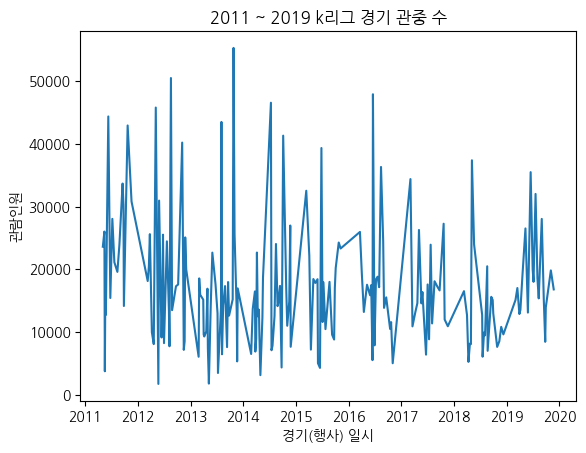

In [17]:

import seaborn as sns
sns.lineplot(data=main_income, x="경기(행사) 일시", y="관람인원")
plt.title('2011 ~ 2019 k리그 경기 관중 수')
plt.show()

In [18]:
def millions_formatter(x, pos):
    return f"{int(x/1e7):,} 만원"


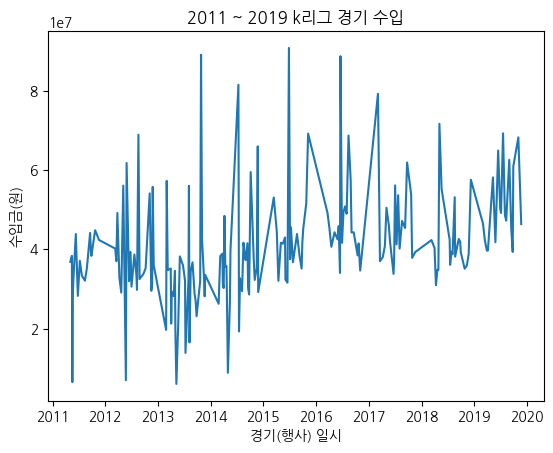

In [19]:
import seaborn as sns
sns.lineplot(data=main_income, x="경기(행사) 일시", y="수입금(원)")
plt.title('2011 ~ 2019 k리그 경기 수입')

plt.show()

In [20]:
main_income_2011 = main_income[main_income['경기(행사) 일시'].dt.year == 2011]
main_income_2012 = main_income[main_income['경기(행사) 일시'].dt.year == 2012]
main_income_2013 = main_income[main_income['경기(행사) 일시'].dt.year == 2013]
main_income_2014 = main_income[main_income['경기(행사) 일시'].dt.year == 2014]
main_income_2015 = main_income[main_income['경기(행사) 일시'].dt.year == 2015]
main_income_2016 = main_income[main_income['경기(행사) 일시'].dt.year == 2016]
main_income_2017 = main_income[main_income['경기(행사) 일시'].dt.year == 2017]
main_income_2018 = main_income[main_income['경기(행사) 일시'].dt.year == 2018]
main_income_2019 = main_income[main_income['경기(행사) 일시'].dt.year == 2019]

In [21]:
main_income_2011

,경기(행사) 일시,구 분,경기(행사) 종류,경기(행사) 내용,주 최,관람인원,수입금(원),사용일수(일),경기 월일
0,2011-05-04,NaN,FC서울홈경기,ACL(vs알아인),GS스포츠,23593,36821430,2.0,05-04
1,2011-05-15,NaN,FC서울홈경기,K리그(vs경남),GS스포츠,26008,38325470,1.0,05-15
2,2011-05-18,NaN,FC서울홈경기,FA컵(vs용인시청),GS스포츠,3733,6504670,1.0,05-18
3,2011-05-21,NaN,FC서울홈경기,K리그(vs대구),GS스포츠,14817,28484710,1.0,05-21
4,2011-05-25,NaN,FC서울홈경기,ACL(vs가시마 엔틀러스),GS스포츠,12725,32208280,2.0,05-25
7,2011-06-11,NaN,FC서울홈경기,K리그(vs포항),GS스포츠,44358,43836790,1.0,06-11
9,2011-06-25,NaN,FC서울홈경기,K리그(vs인천),GS스포츠,15414,28239910,1.0,06-25
10,2011-07-09,NaN,FC서울홈경기,K리그(vs상주),GS스포츠,28034,37067540,1.0,07-09
11,2011-07-23,NaN,FC서울홈경기,K리그(vs광주),GS스포츠,21112,33355860,1.0,07-23
12,2011-08-13,NaN,FC서울홈경기,K리그(vs전남),GS스포츠,19578,32073920,1.0,08-13


In [22]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [23]:
pip install --upgrade matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


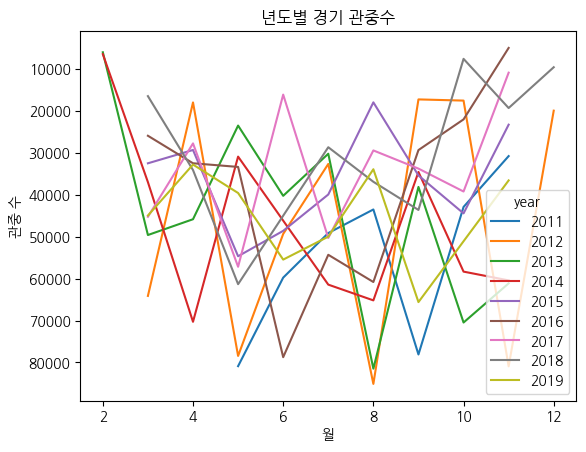

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Add columns for year and month
main_income['year'] = main_income['경기(행사) 일시'].dt.year
main_income['month'] = main_income['경기(행사) 일시'].dt.month

# Group the data by year and month, and calculate the sum of income for each group
monthly_income = main_income.groupby(['year', 'month']).agg({'관람인원': 'sum'}).reset_index()

# Pivot the data to create a separate column for each year
monthly_income_pivot = monthly_income.pivot(index='month', columns='year', values='관람인원')

# Set the font family to 'NanumGothic'

sns.lineplot(data=monthly_income_pivot, dashes=False)
plt.xlabel('월')
plt.ylabel('관중 수')
plt.title('년도별 경기 관중수')
plt.show()

In [25]:
main_income_2011['누적관중'] = main_income_2011['관람인원'].cumsum()

<ipython-input-25-6f1cd8063b31>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_income_2011['누적관중'] = main_income_2011['관람인원'].cumsum()


In [26]:
main_income_2012['누적관중'] = main_income_2012['관람인원'].cumsum()
main_income_2013['누적관중'] = main_income_2013['관람인원'].cumsum()
main_income_2014['누적관중'] = main_income_2014['관람인원'].cumsum()
main_income_2015['누적관중'] = main_income_2015['관람인원'].cumsum()
main_income_2016['누적관중'] = main_income_2016['관람인원'].cumsum()
main_income_2017['누적관중'] = main_income_2017['관람인원'].cumsum()
main_income_2018['누적관중'] = main_income_2018['관람인원'].cumsum()
main_income_2019['누적관중'] = main_income_2019['관람인원'].cumsum()

<ipython-input-26-42b60f7032ac>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_income_2012['누적관중'] = main_income_2012['관람인원'].cumsum()
<ipython-input-26-42b60f7032ac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_income_2013['누적관중'] = main_income_2013['관람인원'].cumsum()
<ipython-input-26-42b60f7032ac>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [27]:
main_income_2011['누적수입'] = main_income_2011['수입금(원)'].cumsum()
main_income_2012['누적수입'] = main_income_2012['수입금(원)'].cumsum()
main_income_2013['누적수입'] = main_income_2013['수입금(원)'].cumsum()
main_income_2014['누적수입'] = main_income_2014['수입금(원)'].cumsum()
main_income_2015['누적수입'] = main_income_2015['수입금(원)'].cumsum()
main_income_2016['누적수입'] = main_income_2016['수입금(원)'].cumsum()
main_income_2017['누적수입'] = main_income_2017['수입금(원)'].cumsum()
main_income_2018['누적수입'] = main_income_2018['수입금(원)'].cumsum()
main_income_2019['누적수입'] = main_income_2019['수입금(원)'].cumsum()

<ipython-input-27-c77a0323a5f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_income_2011['누적수입'] = main_income_2011['수입금(원)'].cumsum()
<ipython-input-27-c77a0323a5f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_income_2012['누적수입'] = main_income_2012['수입금(원)'].cumsum()
<ipython-input-27-c77a0323a5f4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [28]:
main_income_cum = pd.concat([main_income_2011,main_income_2012, main_income_2013,main_income_2014,main_income_2015,main_income_2016,main_income_2017,main_income_2018,main_income_2019])

In [29]:
main_income_cum

,경기(행사) 일시,구 분,경기(행사) 종류,경기(행사) 내용,주 최,관람인원,수입금(원),사용일수(일),경기 월일,누적관중,누적수입
0,2011-05-04,NaN,FC서울홈경기,ACL(vs알아인),GS스포츠,23593,36821430,2.0,05-04,23593,36821430
1,2011-05-15,NaN,FC서울홈경기,K리그(vs경남),GS스포츠,26008,38325470,1.0,05-15,49601,75146900
2,2011-05-18,NaN,FC서울홈경기,FA컵(vs용인시청),GS스포츠,3733,6504670,1.0,05-18,53334,81651570
3,2011-05-21,NaN,FC서울홈경기,K리그(vs대구),GS스포츠,14817,28484710,1.0,05-21,68151,110136280
4,2011-05-25,NaN,FC서울홈경기,ACL(vs가시마 엔틀러스),GS스포츠,12725,32208280,2.0,05-25,80876,142344560
...,...,...,...,...,...,...,...,...,...,...,...
349,2019-09-15,K리그,K리그1,2019 K리그1 서울vs인천,(주)GS스포츠,15236,44995210,1.0,09-15,300042,752356952
350,2019-09-25,K리그,K리그1,2019 K리그1 서울vs경남,(주)GS스포츠,8429,39306280,1.0,09-25,308471,791663232
351,2019-09-29,K리그,K리그1,2019 K리그1 서울vs상주,(주)GS스포츠,13914,60876030,1.0,09-29,322385,852539262
362,2019-11-03,K리그,K리그1,2019 K리그1 파이널 서울vs울산,(주)GS스포츠,19813,68202520,1.0,11-03,342198,920741782


In [30]:
main_income_2011['경기(행사) 일시']

0    2011-05-04
1    2011-05-15
2    2011-05-18
3    2011-05-21
4    2011-05-25
7    2011-06-11
9    2011-06-25
10   2011-07-09
11   2011-07-23
12   2011-08-13
13   2011-08-27
15   2011-09-18
16   2011-09-24
17   2011-09-27
23   2011-10-23
25   2011-11-19
Name: 경기(행사) 일시, dtype: datetime64[ns]

In [31]:
main_income_2011

,경기(행사) 일시,구 분,경기(행사) 종류,경기(행사) 내용,주 최,관람인원,수입금(원),사용일수(일),경기 월일,누적관중,누적수입
0,2011-05-04,NaN,FC서울홈경기,ACL(vs알아인),GS스포츠,23593,36821430,2.0,05-04,23593,36821430
1,2011-05-15,NaN,FC서울홈경기,K리그(vs경남),GS스포츠,26008,38325470,1.0,05-15,49601,75146900
2,2011-05-18,NaN,FC서울홈경기,FA컵(vs용인시청),GS스포츠,3733,6504670,1.0,05-18,53334,81651570
3,2011-05-21,NaN,FC서울홈경기,K리그(vs대구),GS스포츠,14817,28484710,1.0,05-21,68151,110136280
4,2011-05-25,NaN,FC서울홈경기,ACL(vs가시마 엔틀러스),GS스포츠,12725,32208280,2.0,05-25,80876,142344560
7,2011-06-11,NaN,FC서울홈경기,K리그(vs포항),GS스포츠,44358,43836790,1.0,06-11,125234,186181350
9,2011-06-25,NaN,FC서울홈경기,K리그(vs인천),GS스포츠,15414,28239910,1.0,06-25,140648,214421260
10,2011-07-09,NaN,FC서울홈경기,K리그(vs상주),GS스포츠,28034,37067540,1.0,07-09,168682,251488800
11,2011-07-23,NaN,FC서울홈경기,K리그(vs광주),GS스포츠,21112,33355860,1.0,07-23,189794,284844660
12,2011-08-13,NaN,FC서울홈경기,K리그(vs전남),GS스포츠,19578,32073920,1.0,08-13,209372,316918580


In [32]:
main_income_2011.reset_index(inplace = True)
main_income_2011

,index,경기(행사) 일시,구 분,경기(행사) 종류,경기(행사) 내용,주 최,관람인원,수입금(원),사용일수(일),경기 월일,누적관중,누적수입
0,0,2011-05-04,NaN,FC서울홈경기,ACL(vs알아인),GS스포츠,23593,36821430,2.0,05-04,23593,36821430
1,1,2011-05-15,NaN,FC서울홈경기,K리그(vs경남),GS스포츠,26008,38325470,1.0,05-15,49601,75146900
2,2,2011-05-18,NaN,FC서울홈경기,FA컵(vs용인시청),GS스포츠,3733,6504670,1.0,05-18,53334,81651570
3,3,2011-05-21,NaN,FC서울홈경기,K리그(vs대구),GS스포츠,14817,28484710,1.0,05-21,68151,110136280
4,4,2011-05-25,NaN,FC서울홈경기,ACL(vs가시마 엔틀러스),GS스포츠,12725,32208280,2.0,05-25,80876,142344560
5,7,2011-06-11,NaN,FC서울홈경기,K리그(vs포항),GS스포츠,44358,43836790,1.0,06-11,125234,186181350
6,9,2011-06-25,NaN,FC서울홈경기,K리그(vs인천),GS스포츠,15414,28239910,1.0,06-25,140648,214421260
7,10,2011-07-09,NaN,FC서울홈경기,K리그(vs상주),GS스포츠,28034,37067540,1.0,07-09,168682,251488800
8,11,2011-07-23,NaN,FC서울홈경기,K리그(vs광주),GS스포츠,21112,33355860,1.0,07-23,189794,284844660
9,12,2011-08-13,NaN,FC서울홈경기,K리그(vs전남),GS스포츠,19578,32073920,1.0,08-13,209372,316918580


In [33]:
main_income_2012.reset_index(inplace = True)
main_income_2013.reset_index(inplace = True)
main_income_2014.reset_index(inplace = True)
main_income_2015.reset_index(inplace = True)
main_income_2016.reset_index(inplace = True)
main_income_2017.reset_index(inplace = True)
main_income_2018.reset_index(inplace = True)
main_income_2019.reset_index(inplace = True)

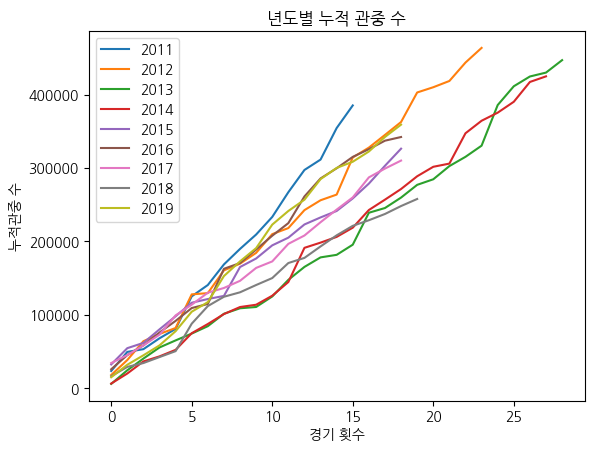

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# 라인 그래프 그리기
plt.plot(main_income_2011.index, main_income_2011['누적관중'], label = '2011')
plt.plot(main_income_2012.index, main_income_2012['누적관중'], label = '2012')
plt.plot(main_income_2013.index, main_income_2013['누적관중'], label = '2013')
plt.plot(main_income_2014.index, main_income_2014['누적관중'], label = '2014')
plt.plot(main_income_2015.index, main_income_2015['누적관중'], label = '2015')
plt.plot(main_income_2016.index, main_income_2016['누적관중'], label = '2016')
plt.plot(main_income_2017.index, main_income_2017['누적관중'], label = '2017')
plt.plot(main_income_2018.index, main_income_2018['누적관중'], label = '2018')
plt.plot(main_income_2019.index, main_income_2019['누적관중'], label = '2019')


# 그래프 제목, 축 라벨 추가
plt.title('년도별 누적 관중 수')
plt.xlabel('경기 횟수')
plt.ylabel('누적관중 수')

plt.legend()

# 그래프 출력
plt.show()

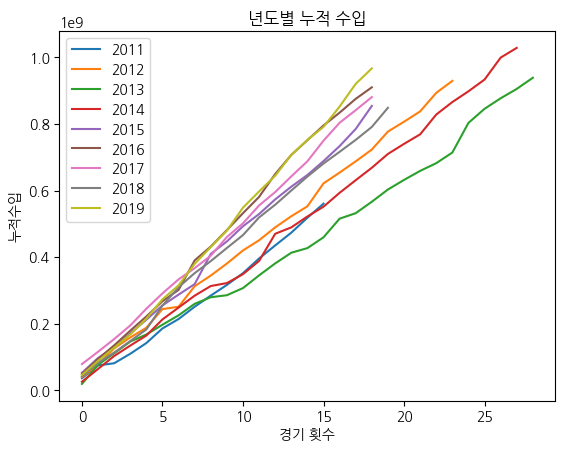

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# 라인 그래프 그리기
plt.plot(main_income_2011.index, main_income_2011['누적수입'], label = '2011')
plt.plot(main_income_2012.index, main_income_2012['누적수입'], label = '2012')
plt.plot(main_income_2013.index, main_income_2013['누적수입'], label = '2013')
plt.plot(main_income_2014.index, main_income_2014['누적수입'], label = '2014')
plt.plot(main_income_2015.index, main_income_2015['누적수입'], label = '2015')
plt.plot(main_income_2016.index, main_income_2016['누적수입'], label = '2016')
plt.plot(main_income_2017.index, main_income_2017['누적수입'], label = '2017')
plt.plot(main_income_2018.index, main_income_2018['누적수입'], label = '2018')
plt.plot(main_income_2019.index, main_income_2019['누적수입'], label = '2019')


# 그래프 제목, 축 라벨 추가
plt.title('년도별 누적 수입')
plt.xlabel('경기 횟수')
plt.ylabel('누적수입')

plt.legend()

# 그래프 출력
plt.show()

In [36]:
main_income

,경기(행사) 일시,구 분,경기(행사) 종류,경기(행사) 내용,주 최,관람인원,수입금(원),사용일수(일),경기 월일,year,month
0,2011-05-04,NaN,FC서울홈경기,ACL(vs알아인),GS스포츠,23593,36821430,2.0,05-04,2011,5
1,2011-05-15,NaN,FC서울홈경기,K리그(vs경남),GS스포츠,26008,38325470,1.0,05-15,2011,5
2,2011-05-18,NaN,FC서울홈경기,FA컵(vs용인시청),GS스포츠,3733,6504670,1.0,05-18,2011,5
3,2011-05-21,NaN,FC서울홈경기,K리그(vs대구),GS스포츠,14817,28484710,1.0,05-21,2011,5
4,2011-05-25,NaN,FC서울홈경기,ACL(vs가시마 엔틀러스),GS스포츠,12725,32208280,2.0,05-25,2011,5
...,...,...,...,...,...,...,...,...,...,...,...
349,2019-09-15,K리그,K리그1,2019 K리그1 서울vs인천,(주)GS스포츠,15236,44995210,1.0,09-15,2019,9
350,2019-09-25,K리그,K리그1,2019 K리그1 서울vs경남,(주)GS스포츠,8429,39306280,1.0,09-25,2019,9
351,2019-09-29,K리그,K리그1,2019 K리그1 서울vs상주,(주)GS스포츠,13914,60876030,1.0,09-29,2019,9
362,2019-11-03,K리그,K리그1,2019 K리그1 파이널 서울vs울산,(주)GS스포츠,19813,68202520,1.0,11-03,2019,11


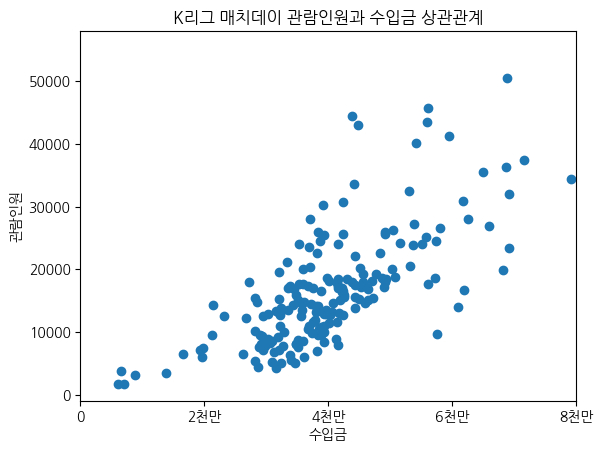

In [37]:
# scatter 그래프 그리기
plt.scatter(main_income['수입금(원)'], main_income['관람인원'])

# 그래프 축 레이블 설정
plt.ylabel('관람인원')
plt.xlabel('수입금')

# x축 범위 설정
plt.xlim(0, 80_000_000) # 0 ~ 80,000,000 까지 범위 설정

# x축 눈금 설정
plt.xticks([0, 20_000_000, 40_000_000, 60_000_000, 80_000_000], ['0', '2천만', '4천만', '6천만', '8천만'])

# 그래프 타이틀 설정
plt.title('K리그 매치데이 관람인원과 수입금 상관관계')

# 그래프 보여주기
plt.show()

In [38]:
main_income_2017

,index,경기(행사) 일시,구 분,경기(행사) 종류,경기(행사) 내용,주 최,관람인원,수입금(원),사용일수(일),경기 월일,누적관중,누적수입
0,264,2017-03-05,K리그,K리그 클래식,K리그 클래식(vs수원),GS스포츠,34376,79174040,1.0,03-05,34376,79174040
1,267,2017-03-19,K리그,K리그 클래식,K리그 클래식(vs광주),GS스포츠,10892,36970700,1.0,03-19,45268,116144740
2,271,2017-04-08,K리그,K리그 클래식,K리그 클래식(vs제주),GS스포츠,13175,38079860,1.0,04-08,58443,154224600
3,274,2017-04-22,K리그,K리그 클래식,K리그 클래식(vs인천),GS스포츠,14596,40827270,1.0,04-22,73039,195051870
4,276,2017-05-03,K리그,K리그 클래식,K리그 클래식(vs전남),GS스포츠,26261,50450840,1.0,05-03,99300,245502710
5,281,2017-05-20,K리그,K리그 클래식,K리그 클래식(vs강원),GS스포츠,14560,45898730,1.0,05-20,113860,291401440
6,282,2017-05-27,K리그,K리그 클래식,K리그 클래식(vs울산),GS스포츠,16359,42134530,1.0,05-27,130219,333535970
7,285,2017-06-21,K리그,K리그 클래식,K리그 클래식(vs대구),GS스포츠,6384,33789660,1.0,06-21,136603,367325630
8,286,2017-06-25,K리그,K리그 클래식,K리그 클래식(vs상주),GS스포츠,9757,37307610,1.0,06-25,146360,404633240
9,287,2017-07-02,K리그,K리그 클래식,K리그 클래식(vs전북),GS스포츠,17571,56086320,1.0,07-02,163931,460719560


In [39]:
main_income_2019['월'] = pd.DatetimeIndex(main_income_2019['경기(행사) 일시']).month
main_income_2011['월'] = pd.DatetimeIndex(main_income_2011['경기(행사) 일시']).month
main_income_2012['월'] = pd.DatetimeIndex(main_income_2012['경기(행사) 일시']).month
main_income_2013['월'] = pd.DatetimeIndex(main_income_2013['경기(행사) 일시']).month
main_income_2014['월'] = pd.DatetimeIndex(main_income_2014['경기(행사) 일시']).month
main_income_2015['월'] = pd.DatetimeIndex(main_income_2015['경기(행사) 일시']).month
main_income_2016['월'] = pd.DatetimeIndex(main_income_2016['경기(행사) 일시']).month
main_income_2017['월'] = pd.DatetimeIndex(main_income_2017['경기(행사) 일시']).month
main_income_2018['월'] = pd.DatetimeIndex(main_income_2018['경기(행사) 일시']).month

<ipython-input-39-6fe1e977a30c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_income_2019['월'] = pd.DatetimeIndex(main_income_2019['경기(행사) 일시']).month
<ipython-input-39-6fe1e977a30c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_income_2011['월'] = pd.DatetimeIndex(main_income_2011['경기(행사) 일시']).month
<ipython-input-39-6fe1e977a30c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [ ]:
gb_2019 = main_income_2019.groupby(['월']).mean()
gb_2019.reset_index(inplace = True)
gb_2019.drop(['index'], axis = 1, inplace = True)

gb_2011 = main_income_2011.groupby(['월']).mean()
gb_2011.reset_index(inplace = True)
gb_2011.drop(['index'], axis = 1, inplace = True)

gb_2012 = main_income_2012.groupby(['월']).mean()
gb_2012.reset_index(inplace = True)
gb_2012.drop(['index'], axis = 1, inplace = True)

gb_2013 = main_income_2013.groupby(['월']).mean()
gb_2013.reset_index(inplace = True)
gb_2013.drop(['index'], axis = 1, inplace = True)

gb_2014 = main_income_2014.groupby(['월']).mean()
gb_2014.reset_index(inplace = True)
gb_2014.drop(['index'], axis = 1, inplace = True)

gb_2015 = main_income_2015.groupby(['월']).mean()
gb_2015.reset_index(inplace = True)
gb_2015.drop(['index'], axis = 1, inplace = True)

gb_2016 = main_income_2016.groupby(['월']).mean()
gb_2016.reset_index(inplace = True)
gb_2016.drop(['index'], axis = 1, inplace = True)

gb_2017 = main_income_2017.groupby(['월']).mean()
gb_2017.reset_index(inplace = True)
gb_2017.drop(['index'], axis = 1, inplace = True)

gb_2018 = main_income_2018.groupby(['월']).mean()
gb_2018.reset_index(inplace = True)
gb_2018.drop(['index'], axis = 1, inplace = True)

<ipython-input-40-8f49627083d1>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gb_2019 = main_income_2019.groupby(['월']).mean()
<ipython-input-40-8f49627083d1>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gb_2011 = main_income_2011.groupby(['월']).mean()
<ipython-input-40-8f49627083d1>:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gb_2012 = main_income_2012.groupby(['월']).mean()
<ipython-input-40-8f49627083d1>

In [ ]:
gb_2019.head()

In [ ]:
import matplotlib.pyplot as plt

# 막대그래프 그리기
plt.bar(gb_2019['월'], gb_2019['관람인원'])

# x축 레이블 설정
plt.xlabel('월')

# y축 레이블 설정
plt.ylabel('관객 수')

# 그래프 타이틀 설정
plt.title('2019 관객인원 수 월별 그래프')

# 그래프 보여주기
plt.show()

In [ ]:
rain = pd.read_csv('/content/축구한정_강수량.csv')

In [ ]:
rain

In [ ]:
# 함수 정의
def rainday(x):
    if x is not None and x > 0:
        return 1
    else:
        return 0

In [ ]:
rain['강수날'] = rain['1시간 최다 강수량 시각(hhmi)'].apply(rainday)

In [ ]:
rain['일시'] = pd.to_datetime(rain['일시'])
rain.info()

In [ ]:
rain['년도'] = rain['일시'].dt.year
rain

In [ ]:
# 년도별, 강수여부에 따른 관중들의 평균 구하기
gr = rain.groupby('강수날')['수입금(원)'].mean()

df = pd.DataFrame(gr)
df = df.reset_index()
df.replace(0, '비가 안온 날', inplace = True)
df.replace(1, '비온 날', inplace = True)
df

In [ ]:
# 막대그래프 그리기
plt.bar(df['강수날'], df['수입금(원)'], color = ['skyblue', 'orange'])

plt.axhline(y=15009.081081, color='gray', linestyle='--')
plt.yticks(range(0, 45000001, 10000000), [f"{i//10000000}천만원" for i in range(0, 45000001, 10000000)])
# x축 레이블 설정
plt.xlabel('강수 여부')

# y축 레이블 설정
plt.ylabel('평균 수익')

# 그래프 타이틀 설정
plt.title('강수여부에 따른 관람 평균 수익')

# 그래프 보여주기
plt.show()

In [ ]:
import pandas as pd

df = pd.read_csv('/content/1차 전처리 완료_최종2 더비 휴일 포함.csv', encoding = 'cp949')

In [ ]:
df.info()

In [ ]:
gr = df.groupby('휴일 여부')['수입금(원)'].mean()

In [ ]:
gr

In [ ]:
df = pd.DataFrame(gr)
df = df.reset_index()
pd.options.display.float_format = '{:.0f}'.format

In [ ]:
df

In [ ]:
plt.bar(df['휴일 여부'], df['수입금(원)'], color = ['skyblue', 'orange'])

plt.axhline(y=15009.081081, color='gray', linestyle='--')
plt.yticks(range(0, 45000001, 10000000), [f"{i//10000000}천만원" for i in range(0, 45000001, 10000000)])
# x축 레이블 설정
plt.xlabel('휴일 여부')

# y축 레이블 설정
plt.ylabel('평균 수익')

# 그래프 타이틀 설정
plt.title('휴무일에 따른 관람 평균 수익')

# 그래프 보여주기
plt.show()